## Part 1: Univariate Analysis

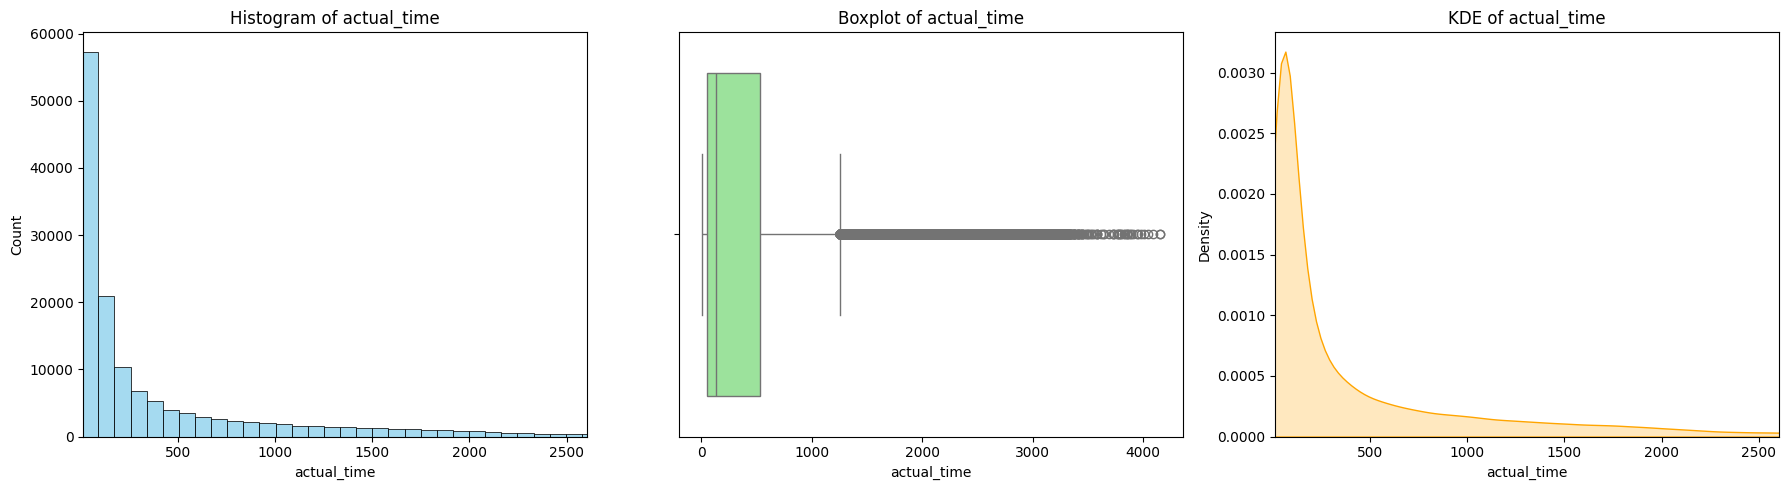

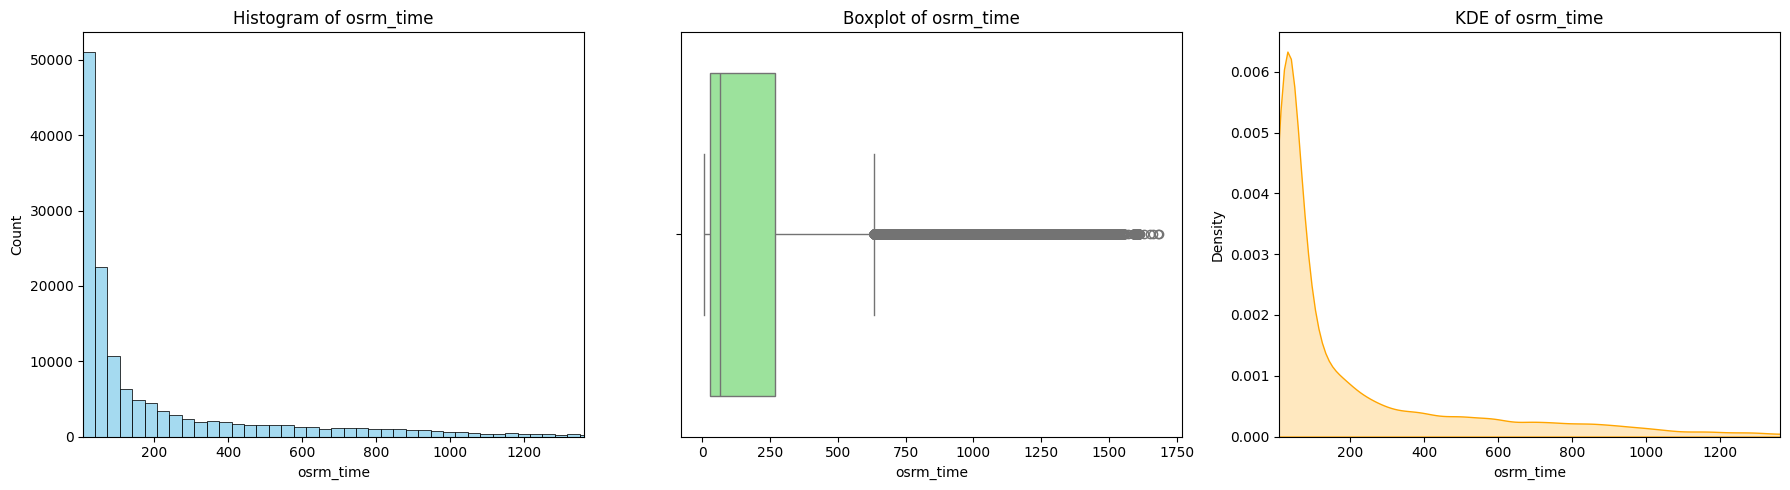

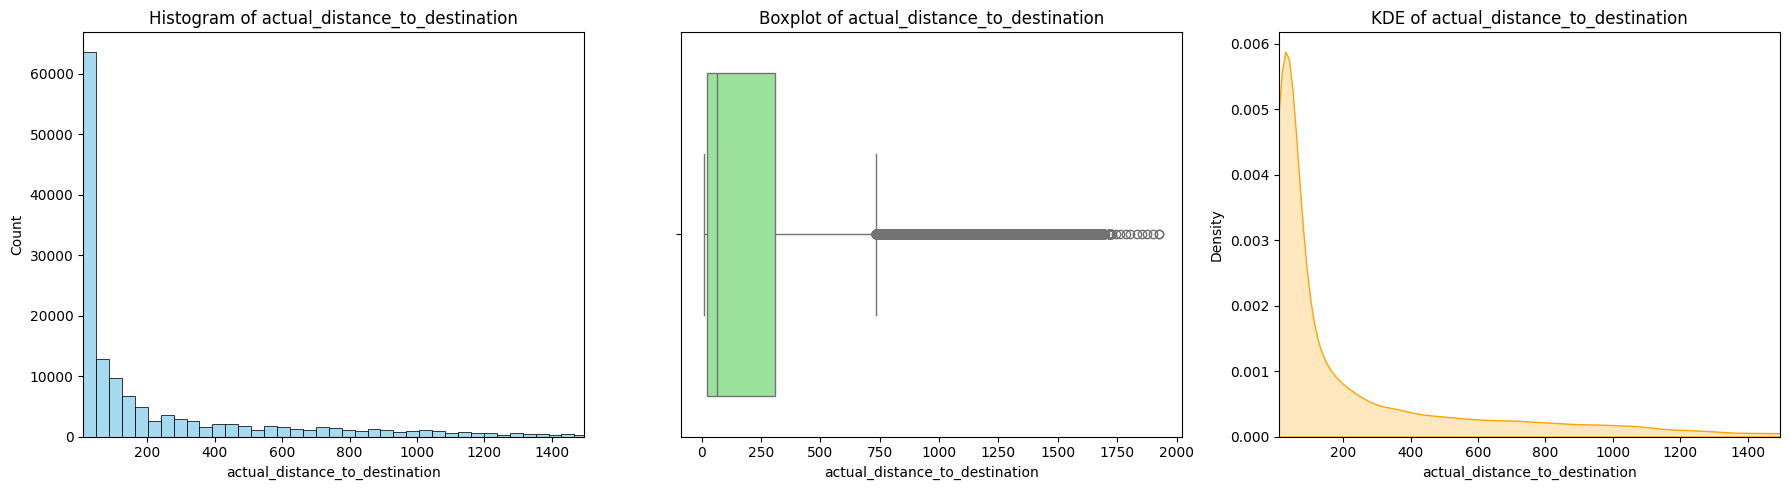

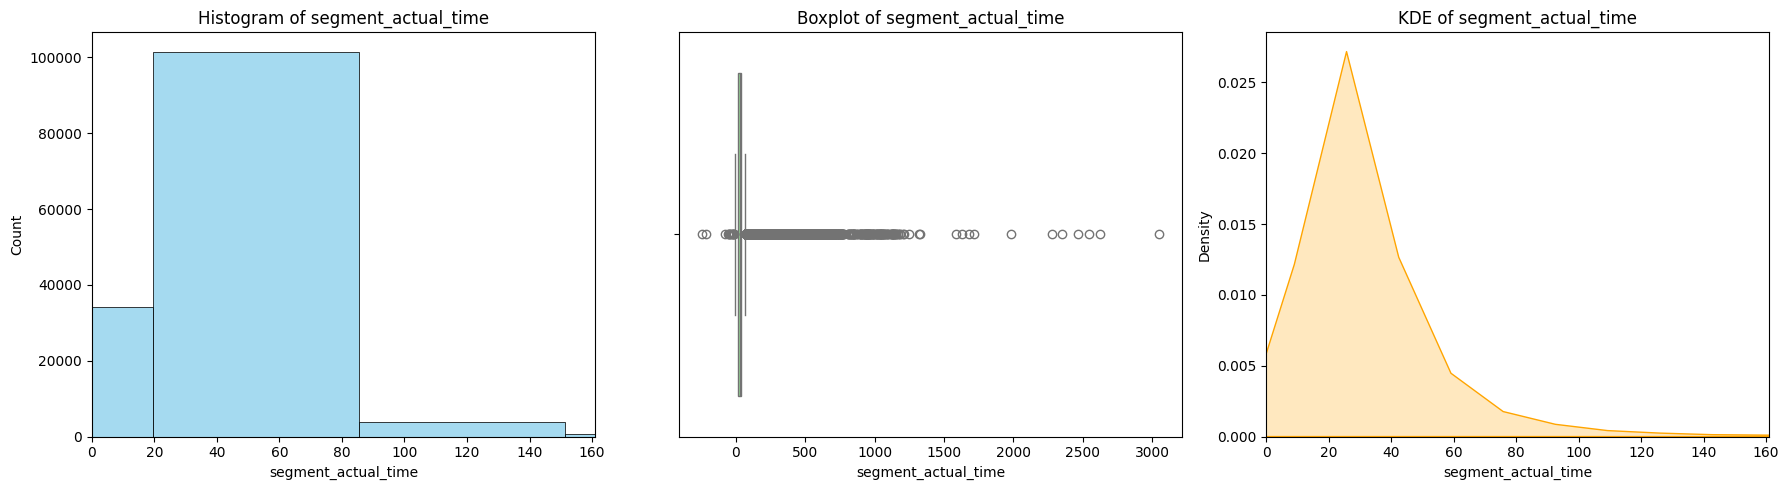

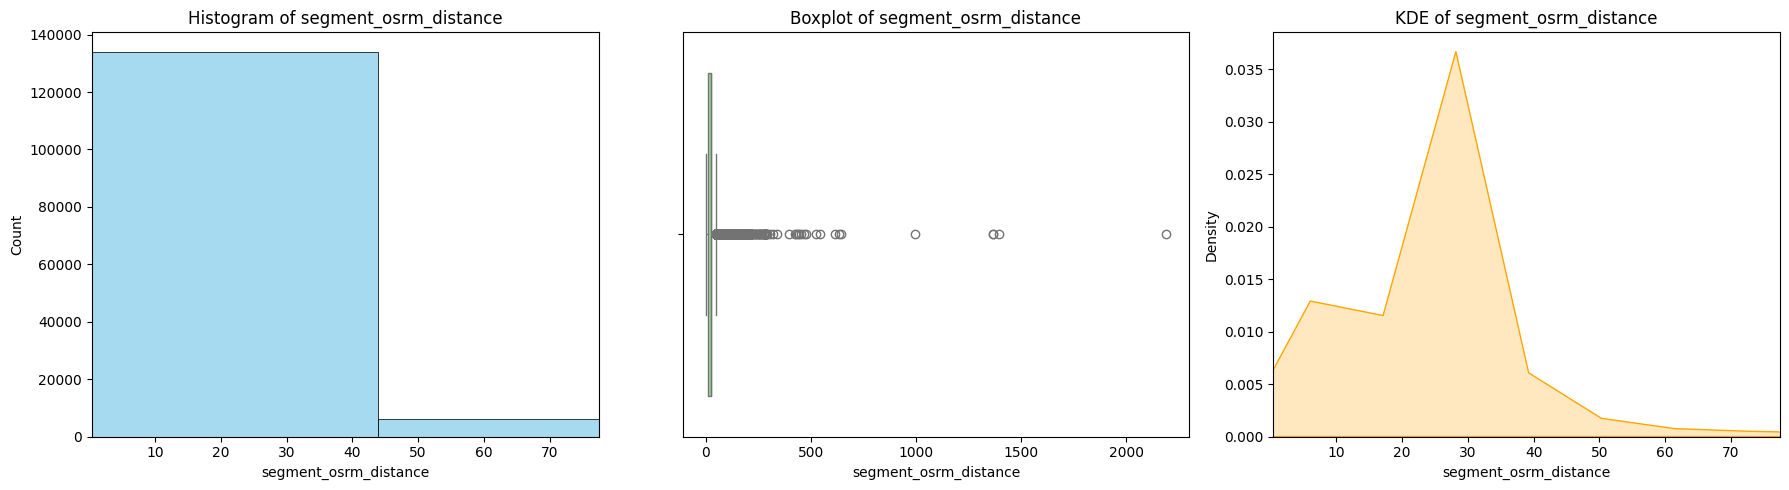

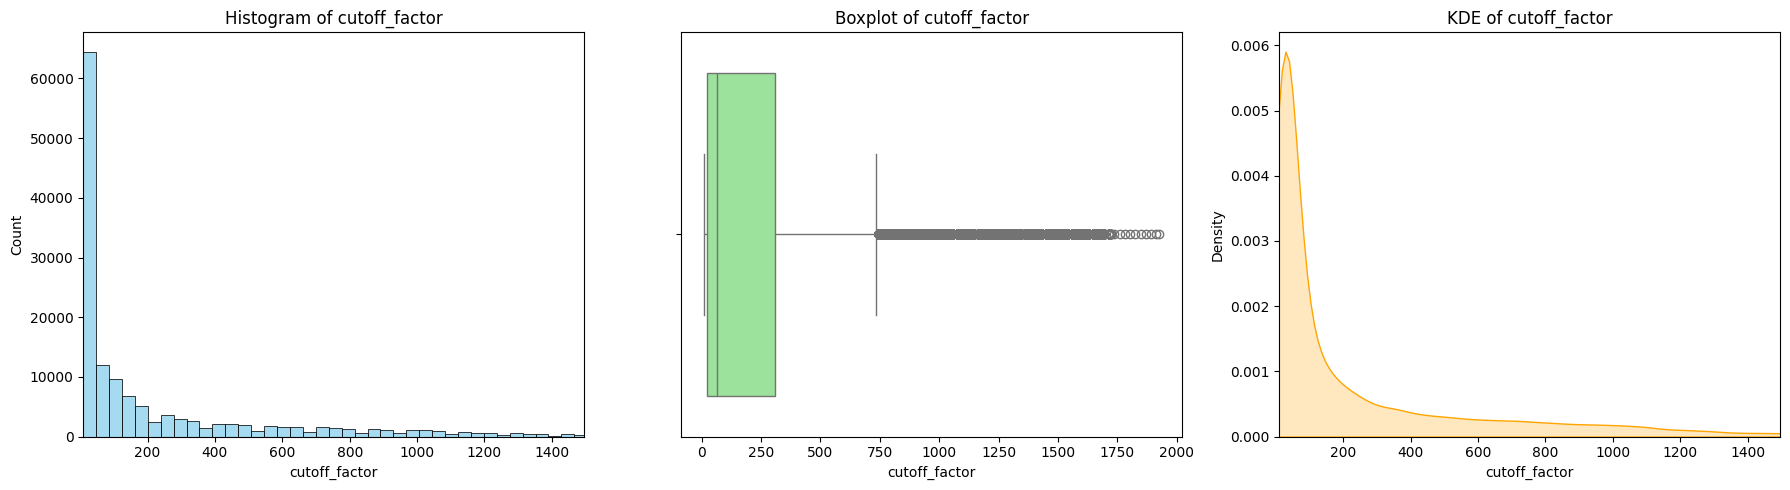

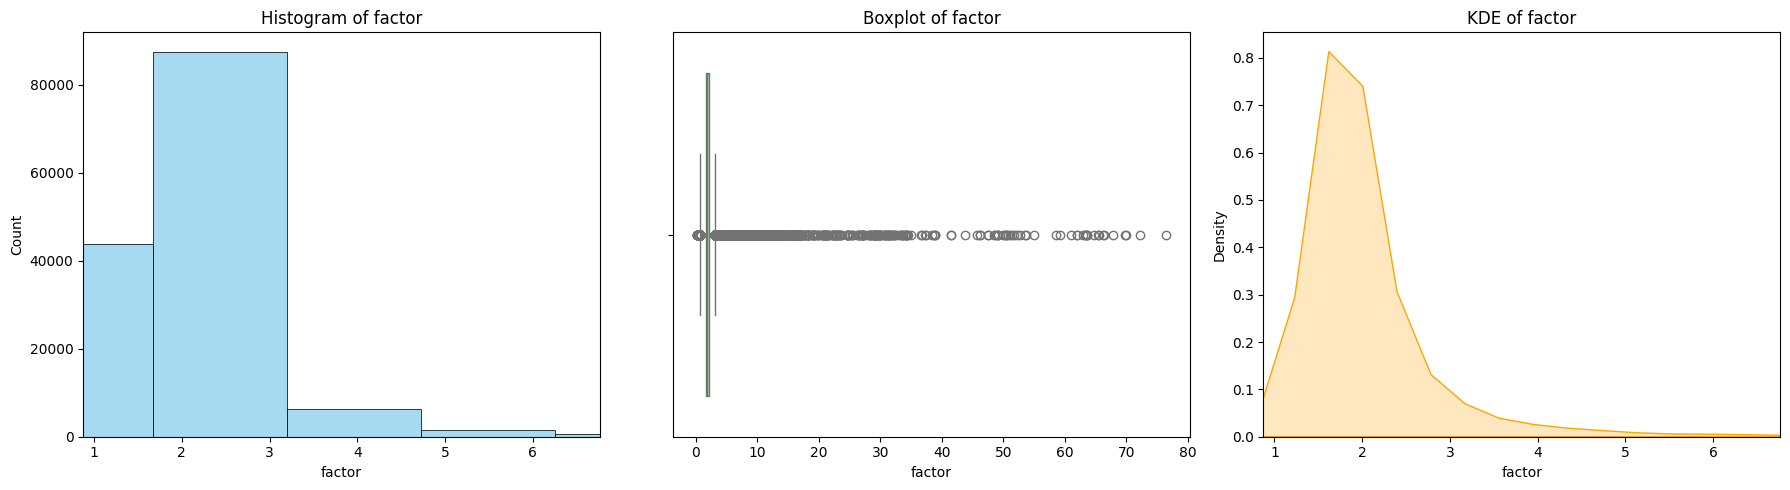

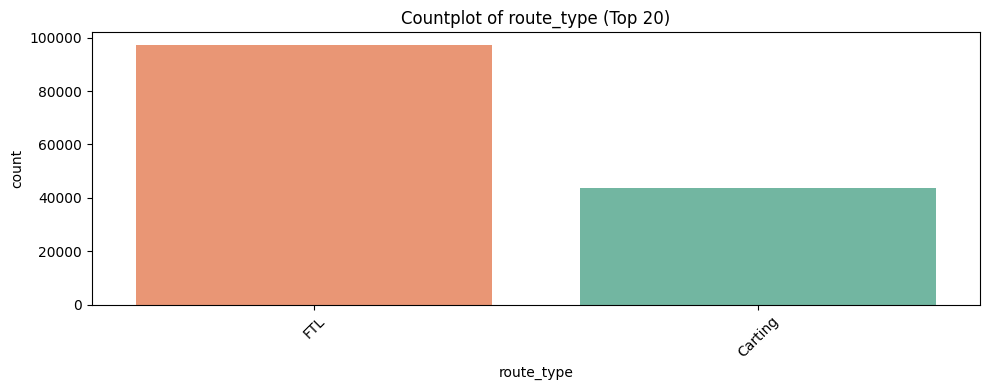

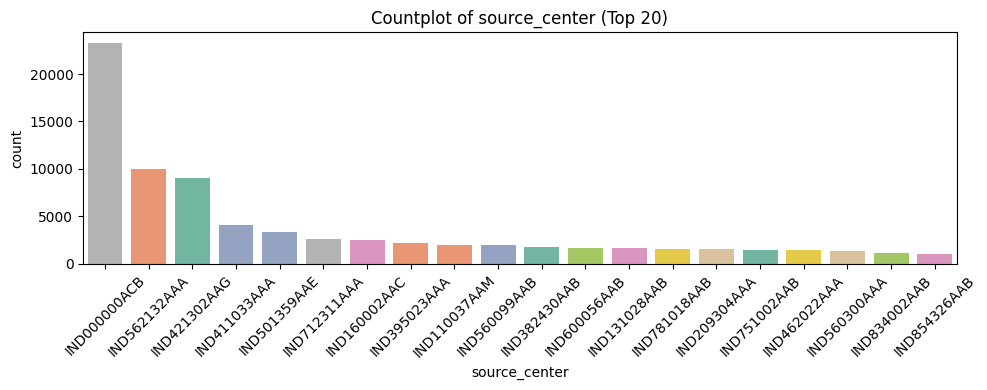

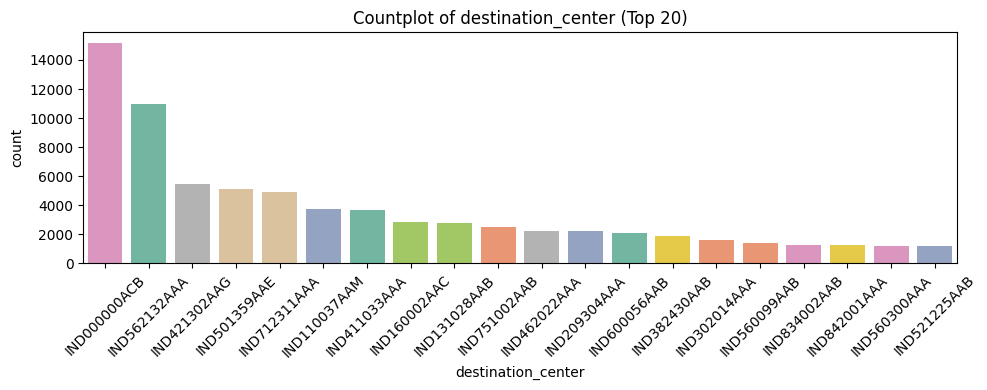

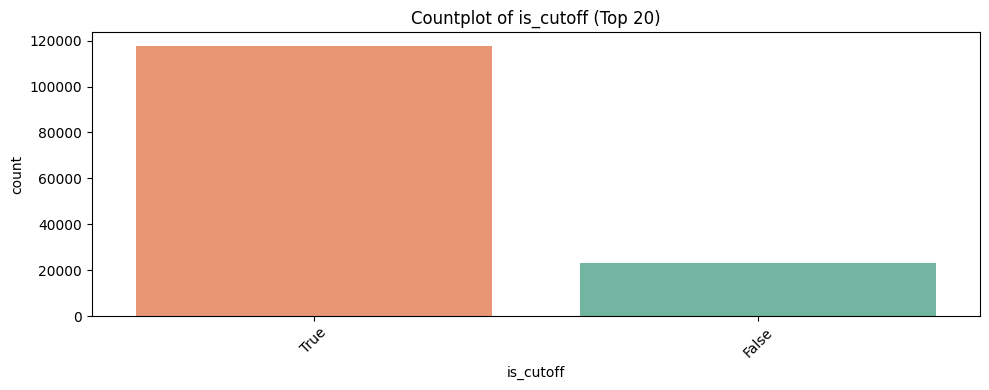

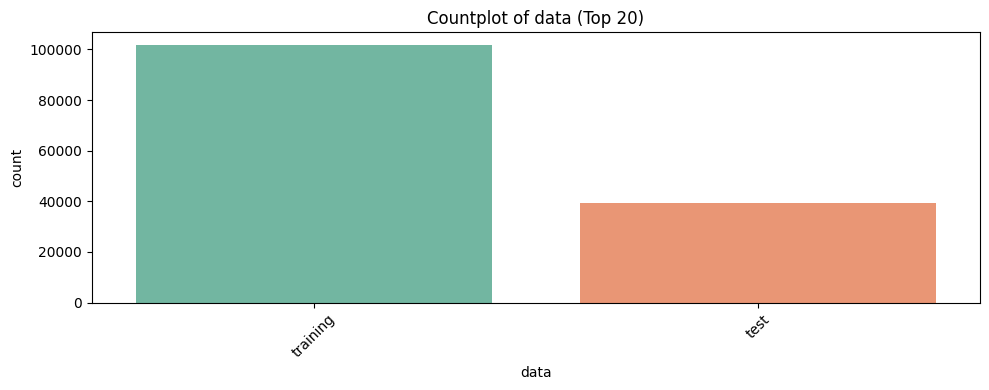

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load data
df = pd.read_csv('clean_dataset.csv')

# Output folder
output_folder = "Univariate_Analysis_png"
os.makedirs(output_folder, exist_ok=True)

# Define columns
numerical_cols = [
    'actual_time', 'osrm_time', 'actual_distance_to_destination',
    'segment_actual_time', 'segment_osrm_distance', 'cutoff_factor', 'factor'
]

categorical_cols = [
    'route_type', 'source_center', 'destination_center',
    'is_cutoff', 'data'
]

id_cols = ['trip_uuid', 'route_schedule_uuid']

# Plot numerical features
for col in numerical_cols:
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    
    # Histogram 
    sns.histplot(df[col], kde=False, ax=ax[0], color='skyblue', bins=50)
    ax[0].set_xlim(df[col].quantile(0.01), df[col].quantile(0.99))
    ax[0].set_title(f"Histogram of {col}")

    # Boxplot
    sns.boxplot(x=df[col], ax=ax[1], color='lightgreen')
    ax[1].set_title(f"Boxplot of {col}")

    # KDE plot
    sns.kdeplot(df[col], ax=ax[2], fill=True, color='orange')
    ax[2].set_xlim(df[col].quantile(0.01), df[col].quantile(0.99))
    ax[2].set_title(f"KDE of {col}")

    plt.tight_layout()
    plt.savefig(f"{output_folder}/numerical_{col}.png")
    plt.show()

# Plot top categories for categorical features
for col in categorical_cols:
    fig, ax = plt.subplots(figsize=(10, 4))
    top_categories = df[col].value_counts().nlargest(20).index
    sns.countplot(
        x=col, hue=col,
        data=df[df[col].isin(top_categories)],
        order=top_categories,
        ax=ax, palette='Set2', legend=False
    )
    ax.set_title(f"Countplot of {col} (Top 20)")
    ax.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.savefig(f"{output_folder}/categorical_{col}.png")
    plt.show()

# Save unique counts of ID fields as a text file
with open(f"{output_folder}/id_unique_counts.txt", "w") as f:
    for col in id_cols:
        f.write(f"{col} — unique count: {df[col].nunique()}\n")


## Part 2: Bivariate Analysis

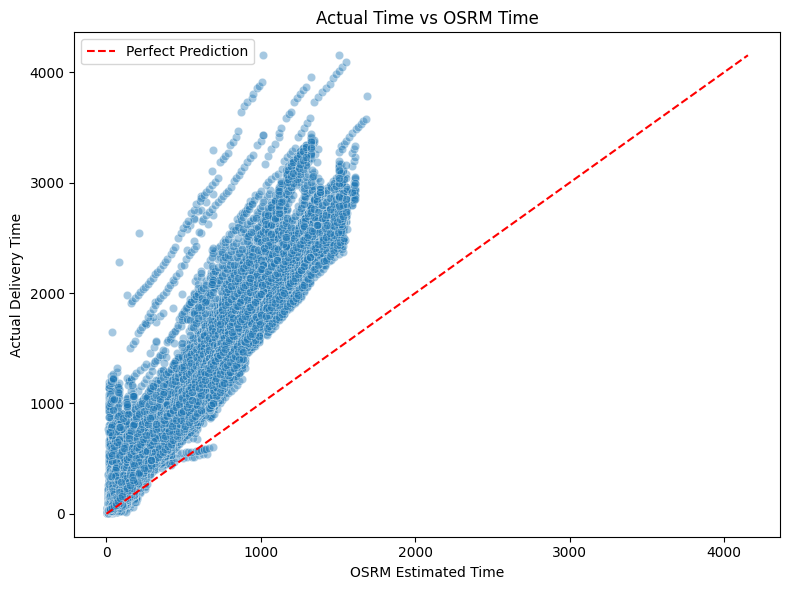

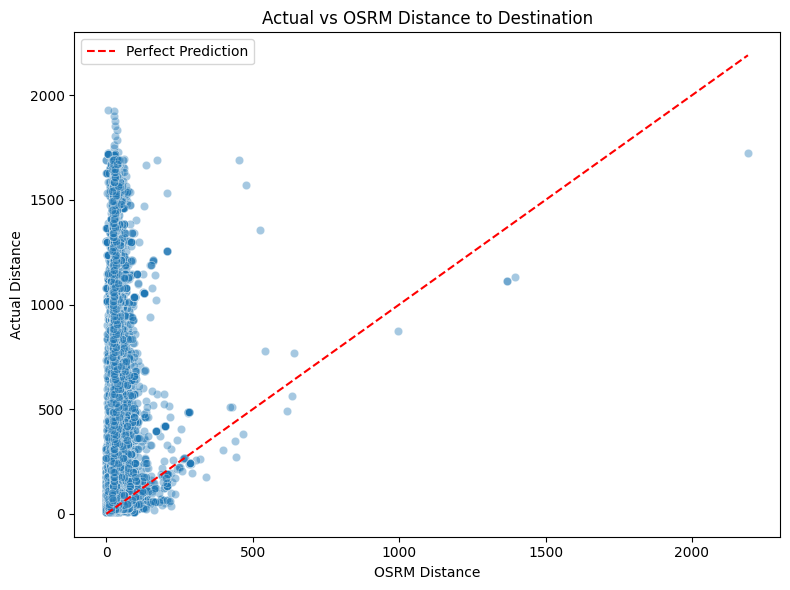

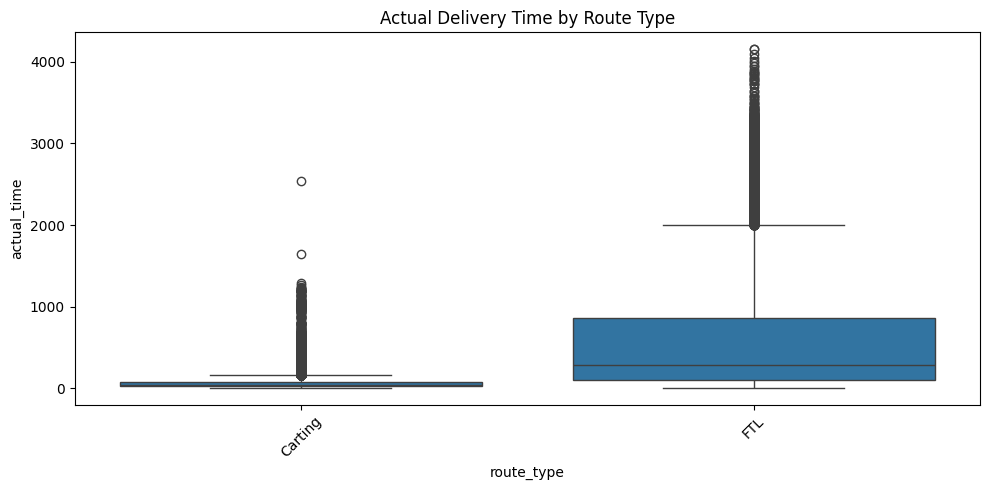

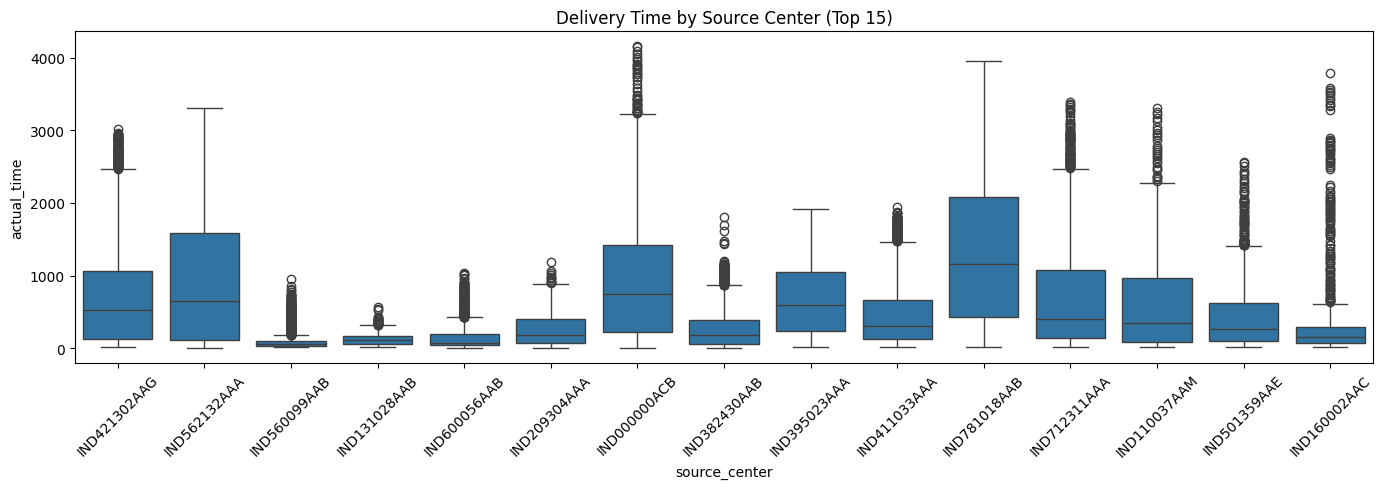

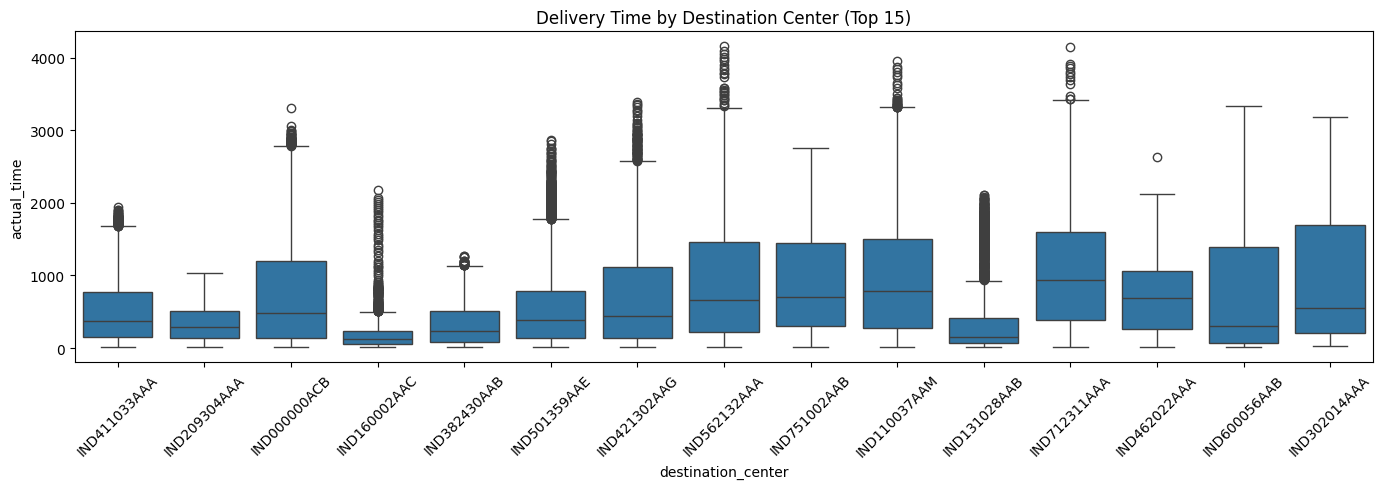

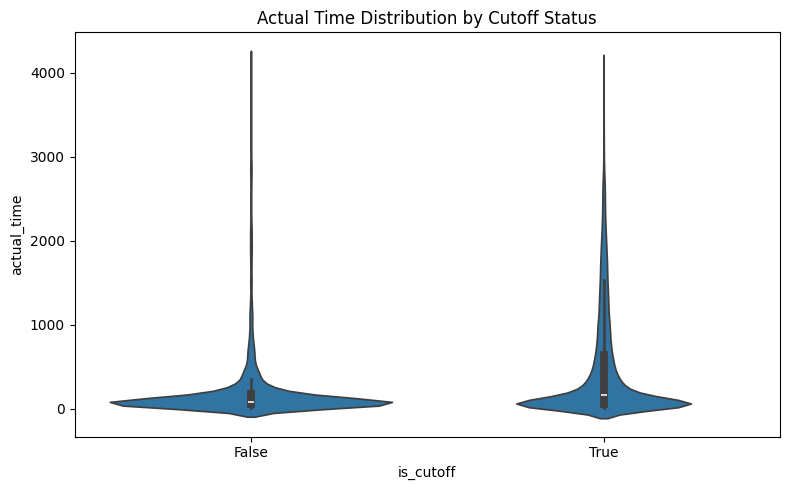

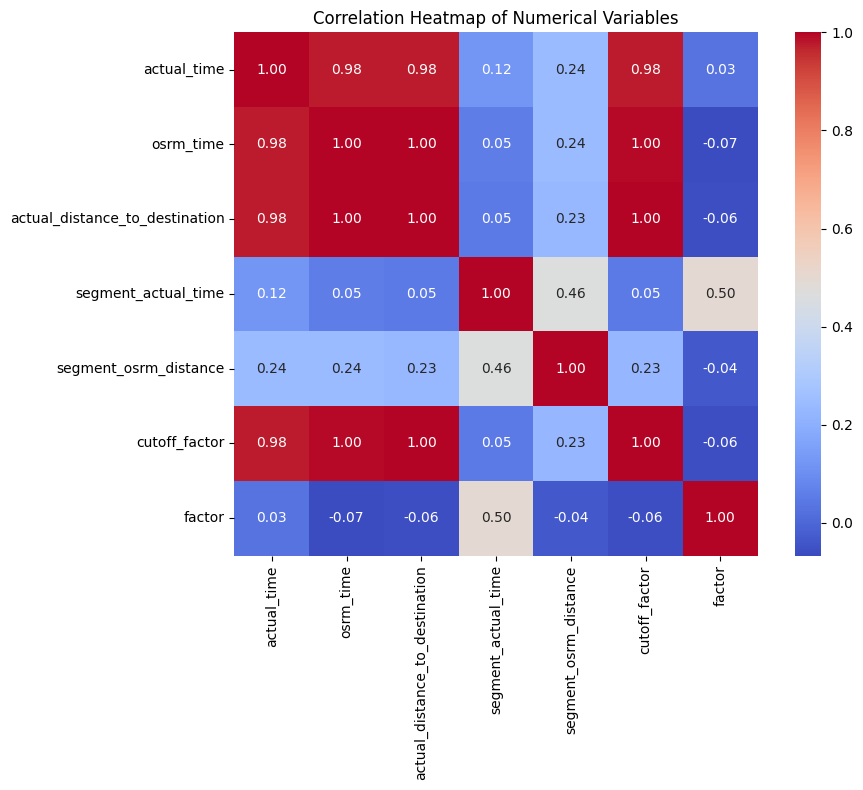

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

df = pd.read_csv('clean_dataset.csv')

output_dir = "bivariate_plots_png"
os.makedirs(output_dir, exist_ok=True)

# 1.1 actual_time vs osrm_time
plt.figure(figsize=(8, 6))
sns.scatterplot(x='osrm_time', y='actual_time', data=df, alpha=0.4)
max_val = max(df['osrm_time'].max(), df['actual_time'].max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Perfect Prediction')
plt.legend()
plt.title('Actual Time vs OSRM Time')
plt.xlabel('OSRM Estimated Time')
plt.ylabel('Actual Delivery Time')
plt.tight_layout()
plt.savefig(f"{output_dir}/actual_vs_osrm_time.png")
plt.show()

# 1.2 actual_distance_to_destination vs segment_osrm_distance
plt.figure(figsize=(8, 6))
sns.scatterplot(x='segment_osrm_distance', y='actual_distance_to_destination', data=df, alpha=0.4)
max_val = max(df['segment_osrm_distance'].max(), df['actual_distance_to_destination'].max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Perfect Prediction')
plt.legend()
plt.title('Actual vs OSRM Distance to Destination')
plt.xlabel('OSRM Distance')
plt.ylabel('Actual Distance')
plt.tight_layout()
plt.savefig(f"{output_dir}/actual_vs_osrm_distance.png")
plt.show()

# 2.1 actual_time vs route_type
plt.figure(figsize=(10, 5))
sns.boxplot(x='route_type', y='actual_time', data=df)
plt.title('Actual Delivery Time by Route Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{output_dir}/actual_time_by_route_type.png")
plt.show()

# 2.2 actual_time vs source_center (Top 15)
plt.figure(figsize=(14, 5))
top_sources = df['source_center'].value_counts().nlargest(15).index
sns.boxplot(x='source_center', y='actual_time', data=df[df['source_center'].isin(top_sources)])
plt.title('Delivery Time by Source Center (Top 15)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{output_dir}/actual_time_by_source_center.png")
plt.show()

# 2.3 actual_time vs destination_center (Top 15)
plt.figure(figsize=(14, 5))
top_dests = df['destination_center'].value_counts().nlargest(15).index
sns.boxplot(x='destination_center', y='actual_time', data=df[df['destination_center'].isin(top_dests)])
plt.title('Delivery Time by Destination Center (Top 15)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{output_dir}/actual_time_by_destination_center.png")
plt.show()

# 2.4 actual_time vs is_cutoff
plt.figure(figsize=(8, 5))
sns.violinplot(x='is_cutoff', y='actual_time', data=df)
plt.title('Actual Time Distribution by Cutoff Status')
plt.tight_layout()
plt.savefig(f"{output_dir}/actual_time_by_is_cutoff.png")
plt.show()

# Correlation Heatmap
num_cols = [
    'actual_time', 'osrm_time', 'actual_distance_to_destination',
    'segment_actual_time', 'segment_osrm_distance', 'cutoff_factor', 'factor'
]
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap of Numerical Variables")
plt.tight_layout()
plt.savefig(f"{output_dir}/correlation_heatmap.png")
plt.show()


## Part 3: Multivariate Analysis

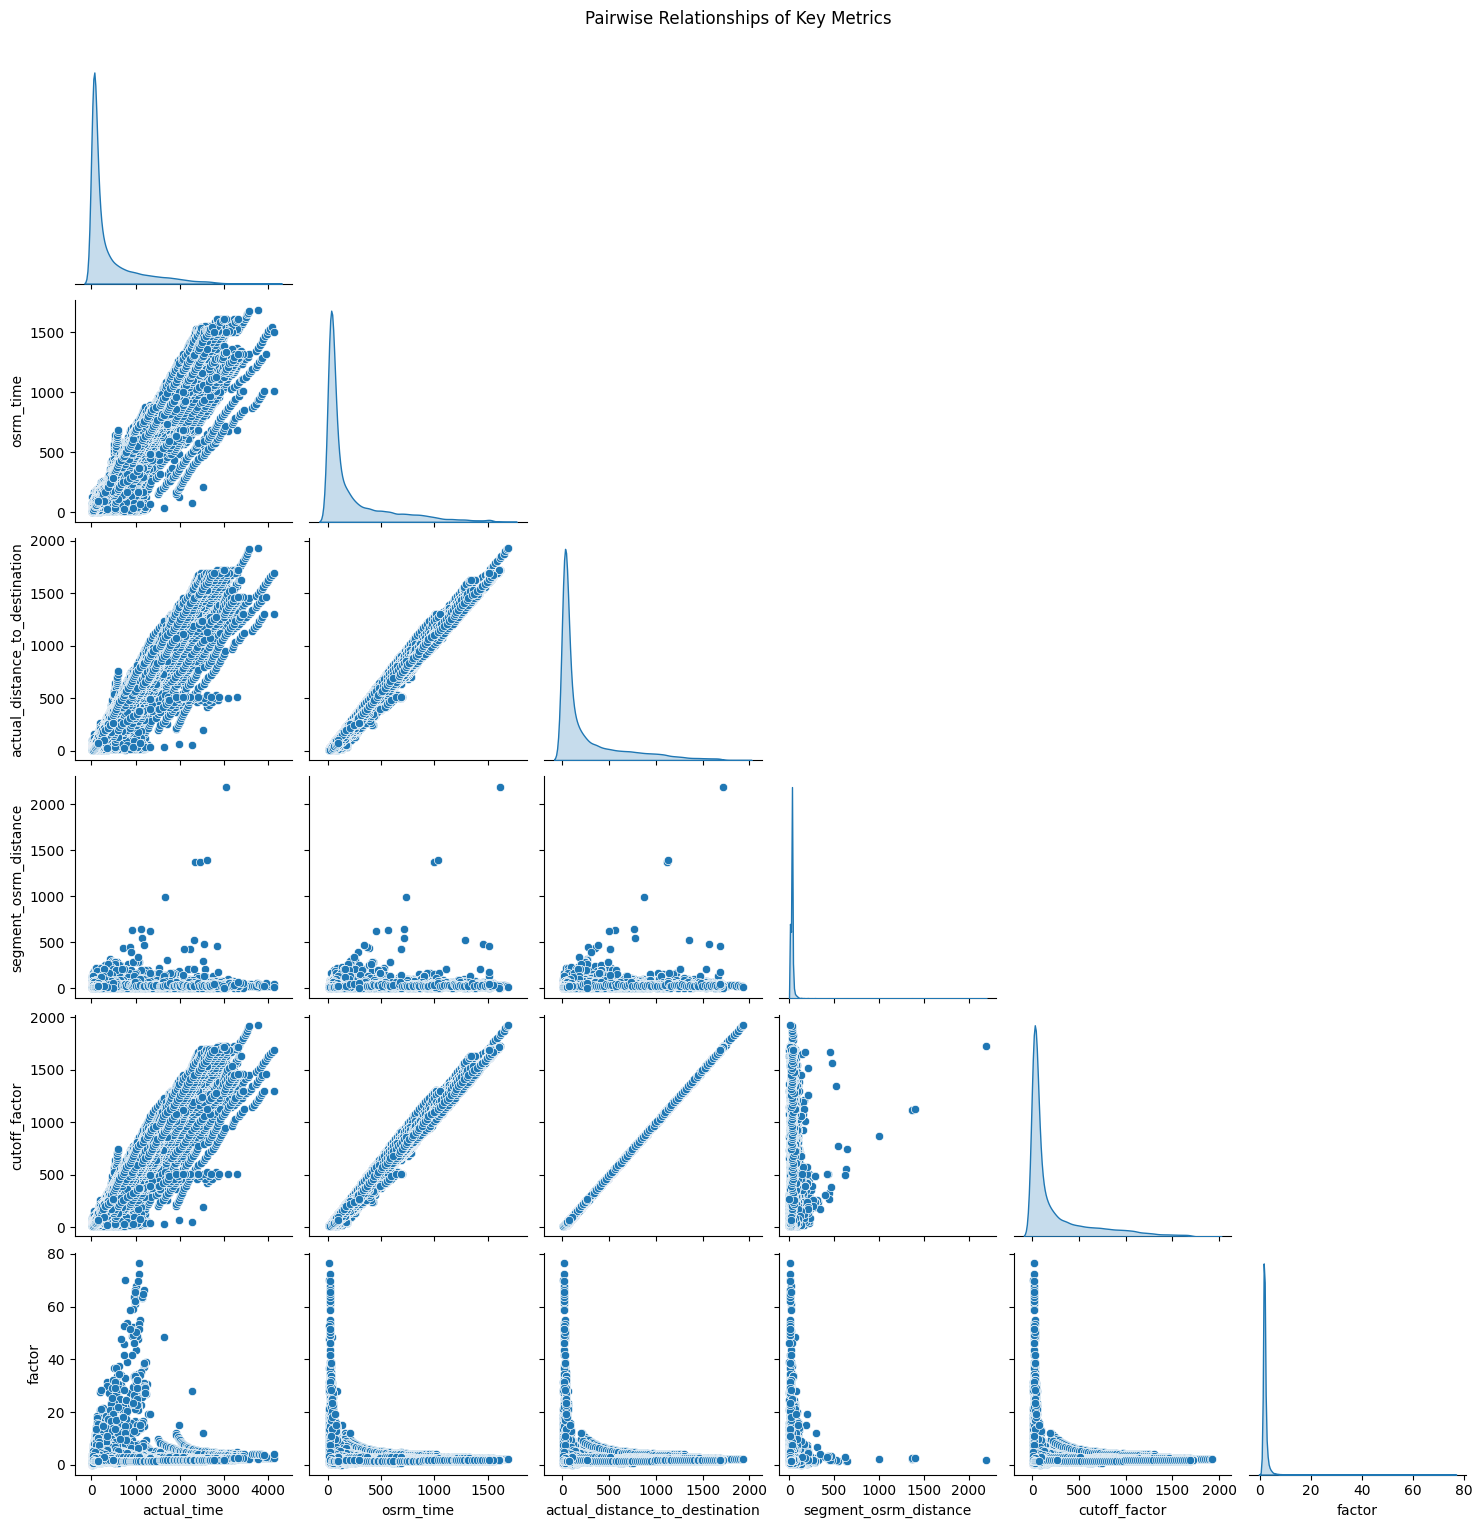

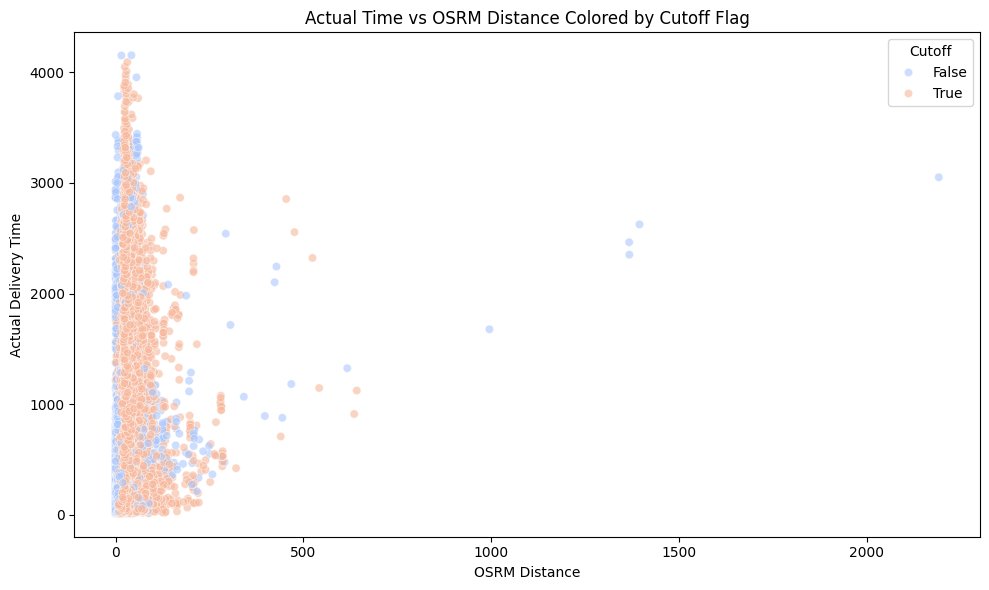

C:\Users\Anushka\AppData\Local\Temp\ipykernel_2136\1678175750.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='route_type', y='actual_time', data=grouped, palette='viridis', hue=None)


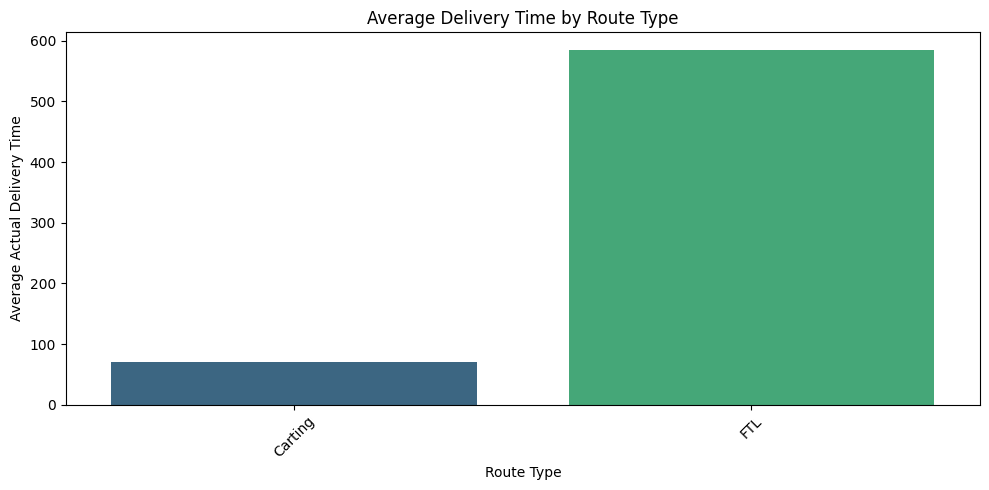

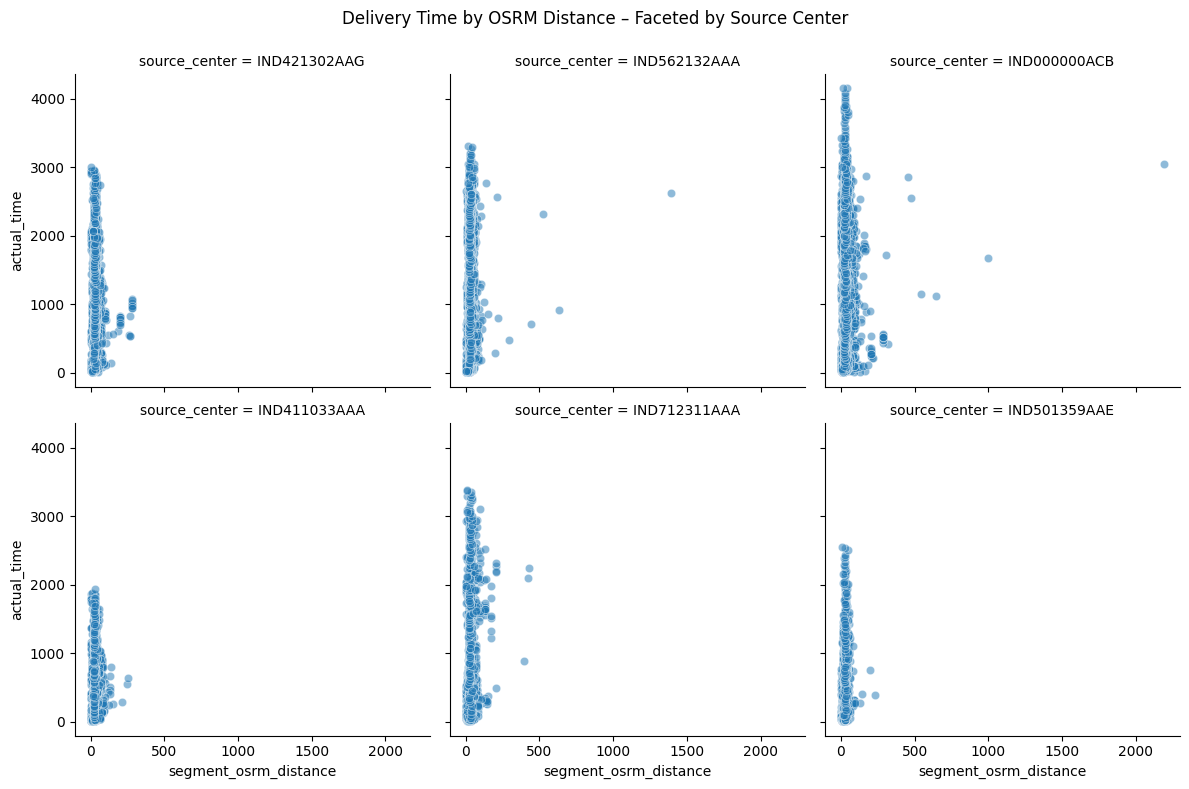

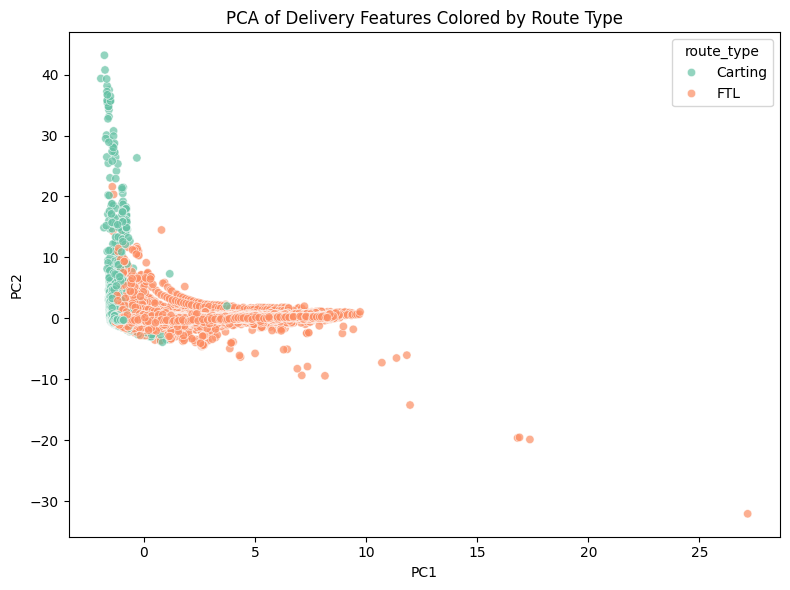

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv('clean_dataset.csv')

# Create output directory
output_dir = "multivariate_plots_png"
os.makedirs(output_dir, exist_ok=True)

# 1. Pairplot
selected_cols = [
    'actual_time', 'osrm_time',
    'actual_distance_to_destination', 'segment_osrm_distance',
    'cutoff_factor', 'factor'
]
pairplot = sns.pairplot(df[selected_cols], diag_kind='kde', corner=True)
pairplot.fig.suptitle("Pairwise Relationships of Key Metrics", y=1.02)
pairplot.savefig(f"{output_dir}/pairwise_relationships.png")
plt.show()

# 2. Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='segment_osrm_distance',
    y='actual_time',
    hue='is_cutoff',
    alpha=0.6,
    palette='coolwarm'
)
plt.title('Actual Time vs OSRM Distance Colored by Cutoff Flag')
plt.xlabel('OSRM Distance')
plt.ylabel('Actual Delivery Time')
plt.legend(title='Cutoff')
plt.tight_layout()
plt.savefig(f"{output_dir}/actual_time_vs_osrm_distance_by_cutoff.png")
plt.show()

# 3. Grouped Bar Plot
grouped = df.groupby('route_type')['actual_time'].mean().reset_index().sort_values(by='actual_time')
plt.figure(figsize=(10, 5))
sns.barplot(x='route_type', y='actual_time', data=grouped, palette='viridis', hue=None)
plt.title("Average Delivery Time by Route Type")
plt.xlabel("Route Type")
plt.ylabel("Average Actual Delivery Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{output_dir}/avg_delivery_time_by_route_type.png")
plt.show()

# 4. FacetGrid
top_sources = df['source_center'].value_counts().nlargest(6).index
facet_data = df[df['source_center'].isin(top_sources)]
g = sns.FacetGrid(facet_data, col='source_center', col_wrap=3, height=4)
g.map(sns.scatterplot, 'segment_osrm_distance', 'actual_time', alpha=0.5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Delivery Time by OSRM Distance – Faceted by Source Center")
g.savefig(f"{output_dir}/facetgrid_delivery_by_source.png")
plt.show()

# 5. PCA Plot
pca_cols = [
    'actual_time', 'osrm_time',
    'actual_distance_to_destination', 'segment_osrm_distance',
    'cutoff_factor', 'factor'
]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[pca_cols].dropna())

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['route_type'] = df['route_type'].values[:len(pca_df)]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='route_type', alpha=0.7, palette='Set2')
plt.title('PCA of Delivery Features Colored by Route Type')
plt.tight_layout()
plt.savefig(f"{output_dir}/pca_route_type.png")
plt.show()
